In [3]:
import numpy as np 
import pandas as pd

In [4]:
rain = pd.read_csv('acidraindata.csv')
rain.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,ethanol,quality
0,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
X = rain.iloc[:,:-1]
y = rain.iloc[:,-1:]
print(X.head())
print(y.head())

   fixed acidity  volatile acidity  citric acid  chlorides  \
0            7.4              0.70         0.00      0.076   
1            7.8              0.88         0.00      0.098   
2            7.8              0.76         0.04      0.092   
3           11.2              0.28         0.56      0.075   
4            7.4              0.70         0.00      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   ethanol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  
   quality
0        5
1        5
2        5
3        6
4        5


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

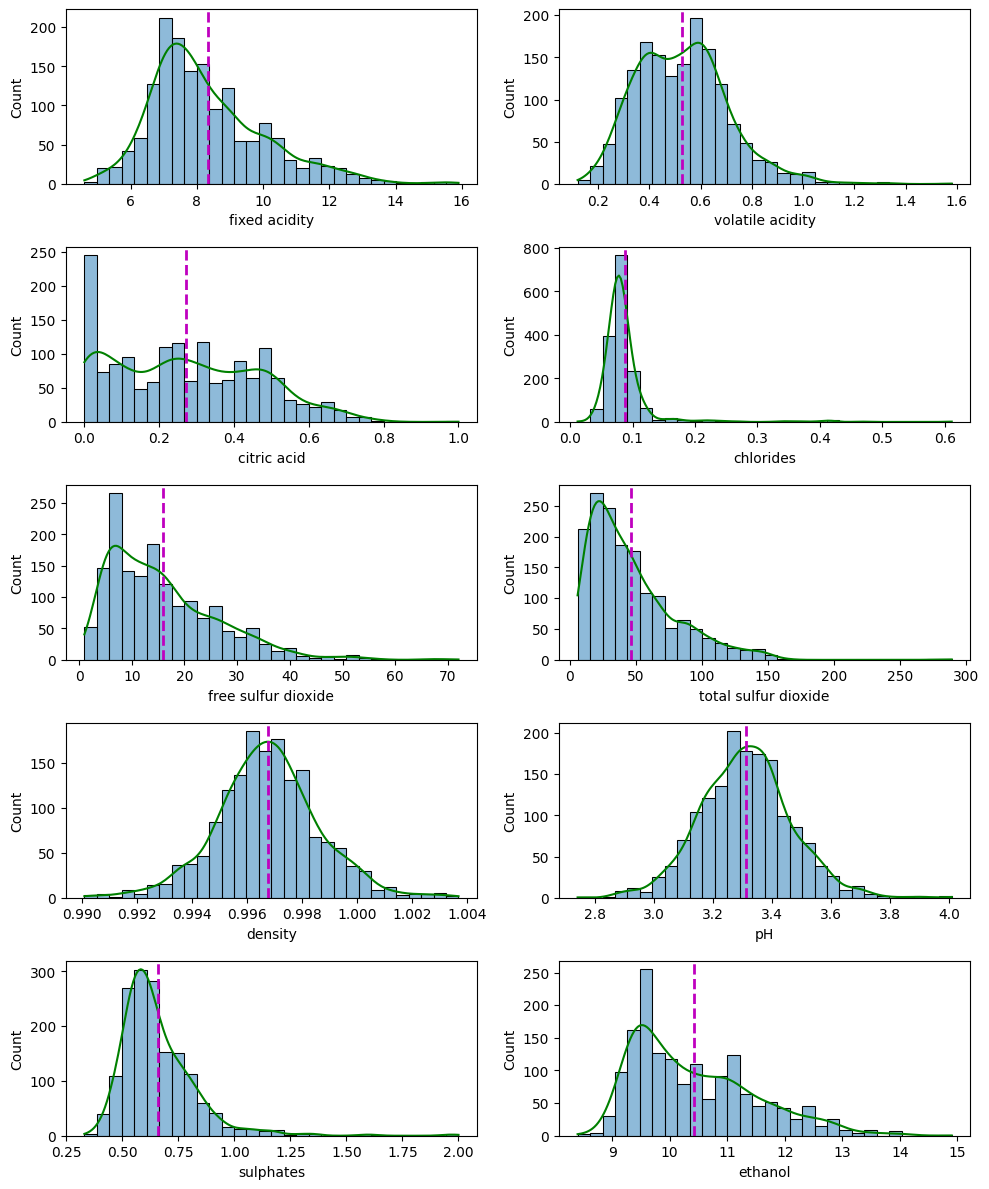

In [7]:
Numeric_cols = rain.drop(columns=['quality']).columns

fig, ax = plt.subplots(5, 2, figsize=(10, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(rain[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('green')
    g.axvline(x=rain[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

X_train,X_test,y_train,y_test = train_test_split(X , y, test_size=0.2) # our main data split into train and test train=80% and test=20%

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 10)
(320, 10)
(1279, 1)
(320, 1)


In [9]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine": svm.SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))


    print('='*35)
    print('\n')

C:\python3.10.7\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python3.10.7\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logisitic Regression
Model performance for Training set
- Accuracy: 0.5966
- F1 score: 0.570838
- Precision: 0.561744
- Recall: 0.596560
----------------------------------
Model performance for Test set
- Accuracy: 0.6156
- Fl score: 0.5858
- Precision: 0.5711
- Recall: 0.6156


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set
- Accuracy: 0.6719
- Fl score: 0.6748
- Precision: 0.6791
- Recall: 0.6719




C:\python3.10.7\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set
- Accuracy: 0.6906
- Fl score: 0.6781
- Precision: 0.6744
- Recall: 0.6906


Support Vector Machine
Model performance for Training set
- Accuracy: 0.5059
- F1 score: 0.452467
- Precision: 0.585961
- Recall: 0.505864
----------------------------------
Model performance for Test set
- Accuracy: 0.4969
- Fl score: 0.4302
- Precision: 0.4576
- Recall: 0.4969


K-Nearest Neighbors
Model performance for Training set
- Accuracy: 0.7381
- F1 score: 0.734269
- Precision: 0.747215
- Recall: 0.738077
----------------------------------
Model performance for Test set
- Accuracy: 0.5125
- Fl score: 0.5115
- Precision: 0.5155
- Recall: 0.5125




C:\python3.10.7\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python3.10.7\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python3.10.7\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
from sklearn.model_selection import cross_val_score
